3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:

# 1. Data Exploration and Understanding:


• Dataset Overview:
1. Load the dataset and display the first 10 rows. bold text

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Assignment 1_ AI/WHR-2024-5CS037.csv")
data.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


2. Identify the number of rows and columns in the dataset.

In [ ]:
rows,columns =data.shape
print(f"Rows:{rows} Columns:{columns}")

Rows:143 Columns:9


3. List all the columns and their data types.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   score                         143 non-null    float64
 2   Log GDP per capita            140 non-null    float64
 3   Social support                140 non-null    float64
 4   Healthy life expectancy       140 non-null    float64
 5   Freedom to make life choices  140 non-null    float64
 6   Generosity                    140 non-null    float64
 7   Perceptions of corruption     140 non-null    float64
 8   Dystopia + residual           140 non-null    float64
dtypes: float64(8), object(1)
memory usage: 10.2+ KB


• Basic Statistics:

1. Calculate the mean, median, and standard deviation for the Score column.

In [ ]:
score_mean = data['score'].mean()
score_median = data['score'].median()
std_dev =data['score'].std()
print(f"Mean:{score_mean},Median:{score_median},Standard deviation:{std_dev}")

Mean:5.52758041958042,Median:5.785,Standard deviation:1.1707165099442995


2. Identify the country with the highest and lowest happiness scores.

In [ ]:

country_highest = data.loc[data['score'].idxmax(),'Country name']
country_lowest = data.loc[data['score'].idxmin(),'Country name']
country_highest,country_lowest

('Finland', 'Afghanistan')

• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [ ]:
null_values = data.isnull().sum()
print(null_values)

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


• Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [ ]:
filtered_score = data[data['score']>=7.5]
filtered_score

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [ ]:
filtered_score = data[data['score']>=7.5]
sorted_gdp = filtered_score.sort_values('Log GDP per capita', ascending=False)
top_10_countries = sorted_gdp.head()
top_10_countries

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)

Medium − (4 ≤ Score ≤ 6)

High − (Score > 6)

In [ ]:
def category(score):
    if score <4:
        return 'Low'
    elif score <=6:
        return 'Medium'
    else:
        return 'High'

data['Happiness_Category']=data['score'].apply(category)
count = data['Happiness_Category'].value_counts()
count

,count
Happiness_Category,
Medium,70
High,56
Low,17


# 2. Data Visualizations:

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

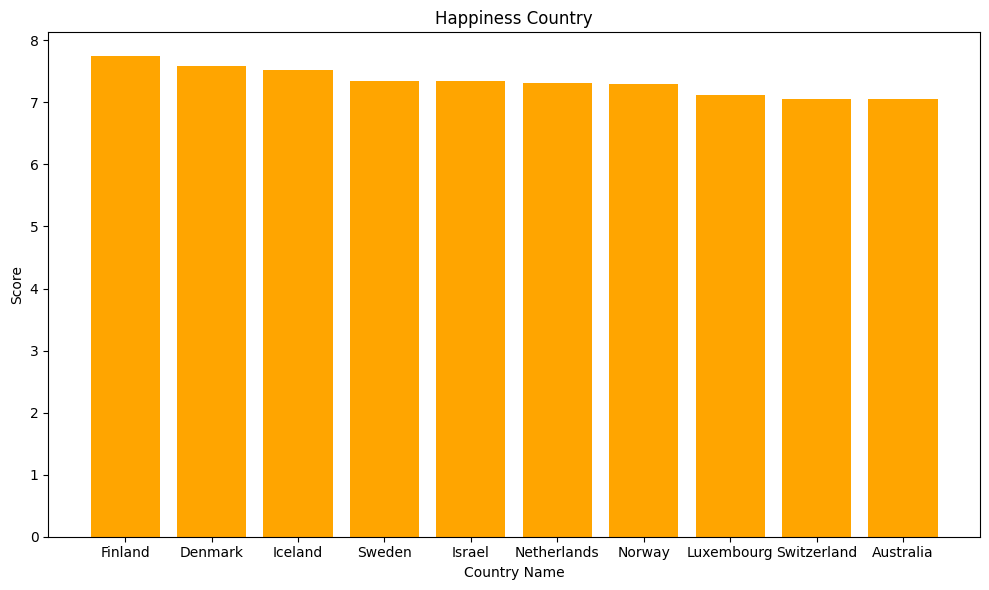

In [ ]:
import matplotlib.pyplot as plt
score_10 = data.sort_values('score', ascending= False)
top_10 = score_10.head(10)
plt.figure(figsize=(10,6))
plt.xlabel('Country Name')
plt.ylabel('Score')
plt.bar(top_10['Country name'],top_10['score'],color ='orange')
plt.title("Happiness Country")
plt.tight_layout()
plt.show()

• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

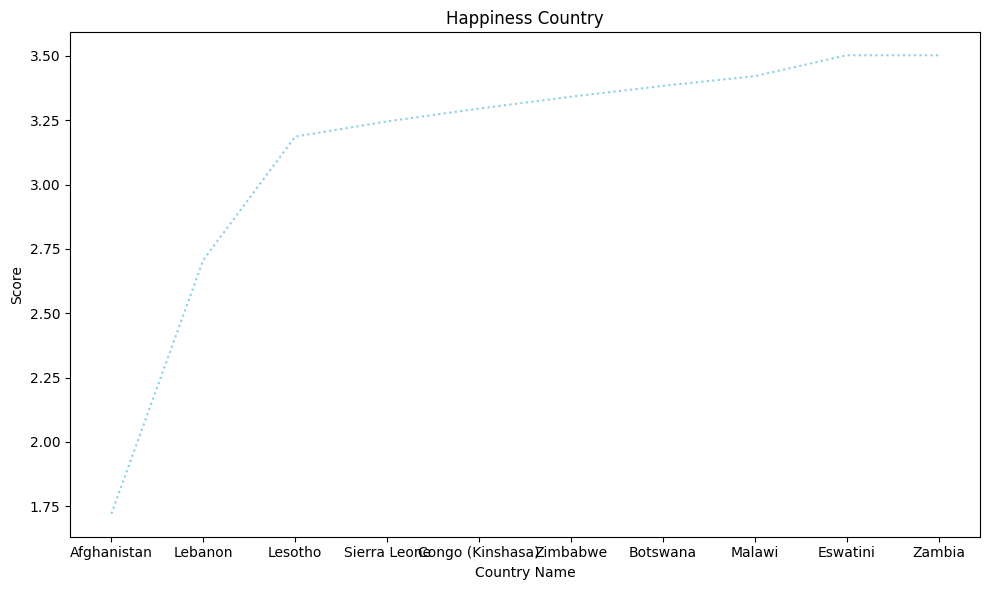

In [ ]:
top_10_unhappiest = data.sort_values('score',ascending=True)
top_10 = top_10_unhappiest.head(10)
plt.figure(figsize=(10,6))
plt.xlabel('Country Name')
plt.ylabel('Score')
plt.plot(top_10['Country name'],top_10['score'],color ='skyblue',ls=':')
plt.title("Happiness Country")
plt.tight_layout()
plt.show()

• Plot a histogram for the Score column to show its distribution and also interpret.

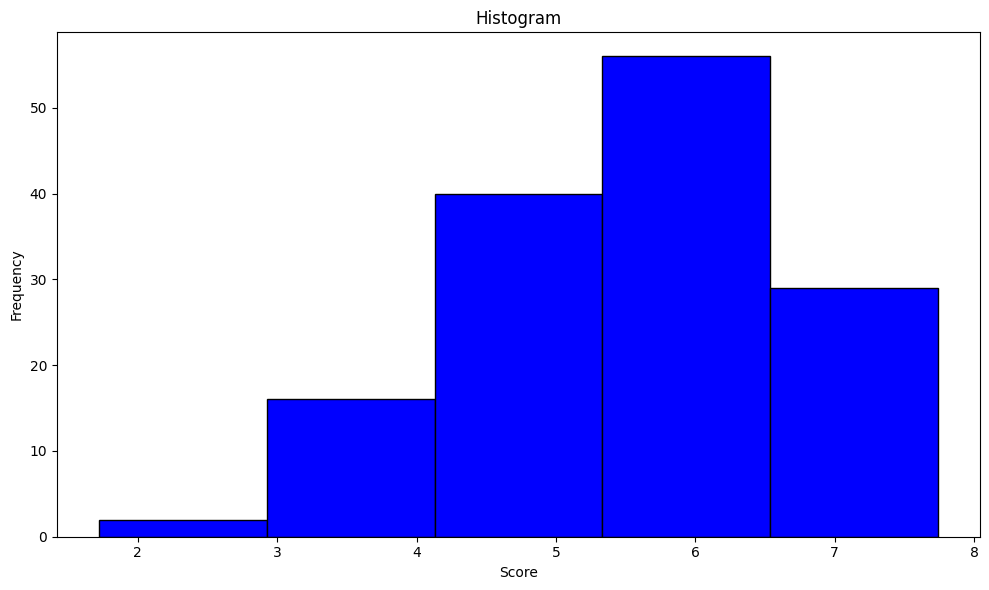

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['score'] ,bins=5, color='blue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.tight_layout()
plt.show()

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

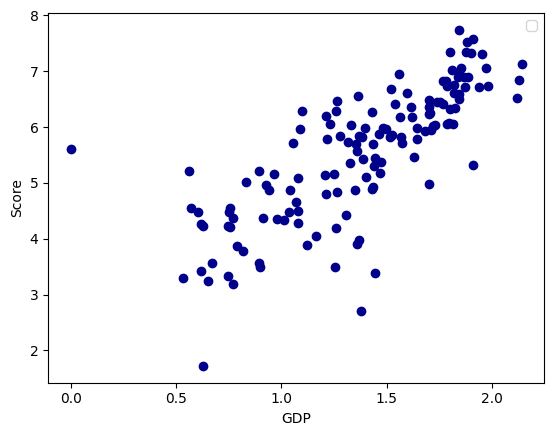

In [ ]:
gdp = data['Log GDP per capita']
scr = data['score']
plt.scatter(x=gdp,y=scr,color="darkblue",marker = 'o')
plt.xlabel("GDP")
plt.ylabel("Score")
plt.legend()
plt.show()

# 3.2 Problem - 2 - Some Advance Data Exploration Task:

# Task - 1 - Setup Task - Preparing the South-Asia Dataset:

1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [ ]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]
filtered_data = data[data['Country name'].isin(south_asian_countries)]
filtered_data.to_csv('/content/drive/MyDrive/Assignment 1_ AI/filtered.csv',index = False)

# Task - 2 - Composite Score Ranking:

Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

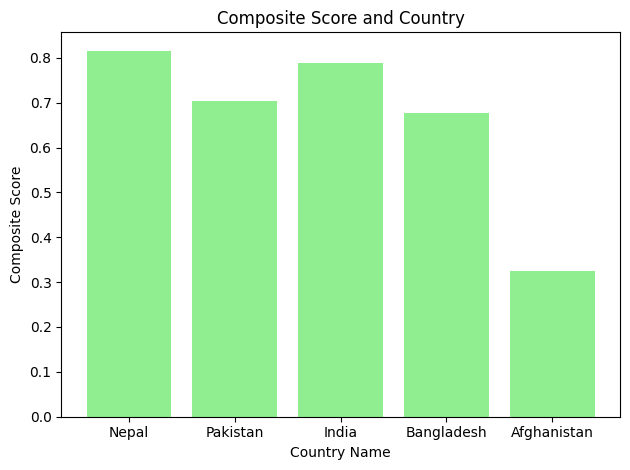

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
reader = pd.read_csv("/content/drive/MyDrive/Assignment 1_ AI/filtered.csv")
SADF = pd.DataFrame(reader)
SADF["Composite Score"]=0.40*SADF['Log GDP per capita']+0.30*SADF['Social support']+0.30*SADF['Healthy life expectancy']
SADF.sort_values(by='Composite Score', ascending=False)
top_5=SADF.head()
x=top_5['Country name']
y=top_5['Composite Score']
x,y
plt.xlabel("Country Name")
plt.ylabel("Composite Score")
plt.bar(x,y,color='lightgreen')
plt.title("Composite Score and Country")
plt.tight_layout()
plt.show()

# Task - 3 - Outlier Detection:

Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

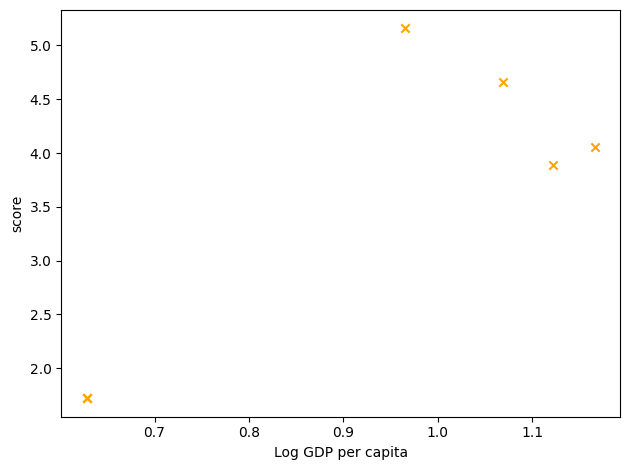

In [ ]:
gdp = SADF['Log GDP per capita']
scr= SADF['score']
def outliers(col_name):
    Q1 = col_name.quantile(0.25)
    Q3 = col_name.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (col_name < lower_bound) | (col_name > upper_bound)
outliers_gdp =outliers(gdp)
outliers_scr =outliers(scr)
SADF['Is outlier'] = outliers_gdp|outliers_scr
SADF[SADF['Is outlier']]
x=gdp
y=scr
plt.scatter(x,y,color="orange",marker='x')
plt.scatter(SADF[outliers_gdp]['Log GDP per capita'], SADF[outliers_gdp]['score'],
            c='orange',label='GDP Outliers',marker='x')
plt.scatter(SADF[outliers_scr]['Log GDP per capita'], SADF[outliers_scr]['score'],
            c='orange',label='Score Outliers',marker='x')
plt.xlabel("Log GDP per capita")
plt.ylabel("score")
plt.tight_layout()
plt.show()
# These outlier are the extreme values that are present in the columns .These outliers have some effects on the mean but a less effect on the  median and the mode.

# Task - 4 - Exploring Trends Across Metrics:

Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

0.801497903141921 0.8773326267276359


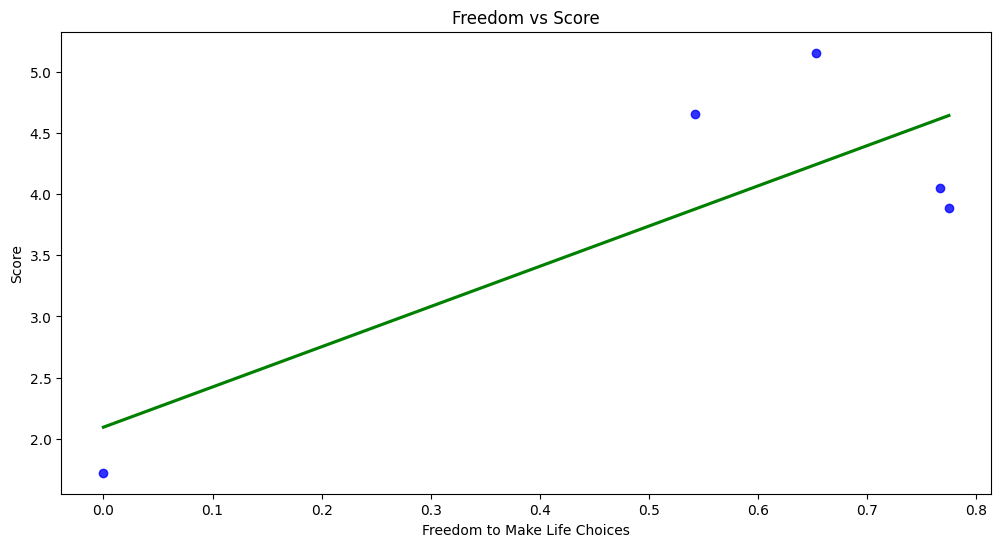

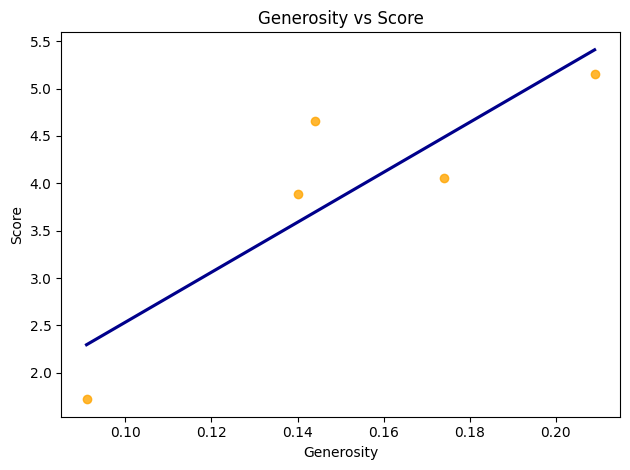

In [ ]:
import seaborn as sb
freedom=SADF['Freedom to make life choices']
generosity=SADF['Generosity']
scr = SADF['score']
cor_freedom=freedom.corr(scr,method='pearson')
cor_generosity=generosity.corr(scr,method='pearson')
print(cor_freedom,cor_generosity)
plt.figure(figsize=(12, 6))
sb.regplot(x='Freedom to make life choices',y='score',data=SADF,ci=None,scatter_kws={'color':'blue'},line_kws={'color':'green'})
plt.title('Freedom vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.show()
sb.regplot(x='Generosity',y='score',data=SADF,ci=None,scatter_kws={'color':'orange'},line_kws={'color':'darkblue'})
plt.title('Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

# Answer:
# The highest the pearsons coefficients between these metrices the strongest the relationship is and the lowest the pearsons coefficient the weakest the relationship. For example here the pearsons coefficient between the freedom and the score is is 0.80 and of that for the generosity and the score is 0.87.so here the stronger relationship is between the generosity and the score.since the pearsons coefficients lies between the values of -1 to 1 higher the coefficient the stronger the relationship.

# Task - 5 - Gap Analysis:

Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

In [ ]:
SADF['GDP-Score']=SADF['Log GDP per capita']-SADF['score']
sort_by_gap_asc = SADF.sort_values(by = 'GDP-Score',ascending = True)
sort_by_gap_des=SADF.sort_values(by = 'GDP-Score',ascending = False)
sort_by_gap_asc.head(3)
sort_by_gap_des.head(3)
# The reasons behind the positive gaps is likely due to High GDP per capita in countries like Maldives Bhutan and the reasons behind the Negative gaps is relatively due to their low gdp.Positive gaps indicate underperformance in quality-of-life factors, while negative gaps show that even lower-income nations can achieve well-being with strong social policies.

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score,Is outlier,GDP-Score
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238,True,-1.093
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774,False,-2.764
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874,False,-2.888


# 3.3 Problem - 3 - Comparative Analysis:

## Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

In [ ]:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]
filtered_data = data[data['Country name'].isin(middle_east_countries)]
middle_east = pd.DataFrame(filtered_data)
middle_east

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


# Complete the following task:
# 1. Descriptive Statistics:

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

• Which region has higher happiness Scores on average?

In [ ]:
mean_middle_east =middle_east['score'].mean()
mean_SADF = SADF['score'].mean()
std_dev=middle_east['score'].std()
std_SADF = SADF['score'].std()
print("Mean scores for the region")
print(mean_middle_east,mean_SADF)
print("Standard deviation for the region")
print(std_dev,std_SADF)
if(mean_middle_east>mean_SADF):
    print("middle east has the high happiness score")
else:
    print("South East has the high happiness score")

Mean scores for the region
5.412100000000001 3.8952000000000004
Standard deviation for the region
1.5662011684327144 1.3160025455902433
middle east has the high happiness score


# 2. Top and Bottom Performers:

• Identify the top 3 and bottom 3 countries in each region based on the score.

• Plot bar charts comparing these charts.

========================For Middle East Countries=========================
4                   Israel
12                  Kuwait
21    United Arab Emirates
Name: Country name, dtype: object
124     Jordan
132      Yemen
141    Lebanon
Name: Country name, dtype: object
========================for South Asian countries============================
0       Nepal
1    Pakistan
2       India
Name: Country name, dtype: object
2          India
3     Bangladesh
4    Afghanistan
Name: Country name, dtype: object


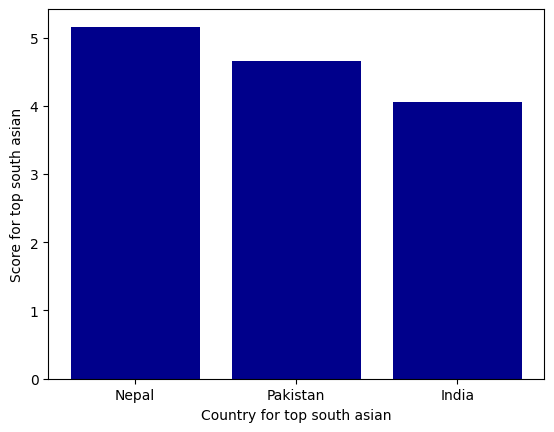

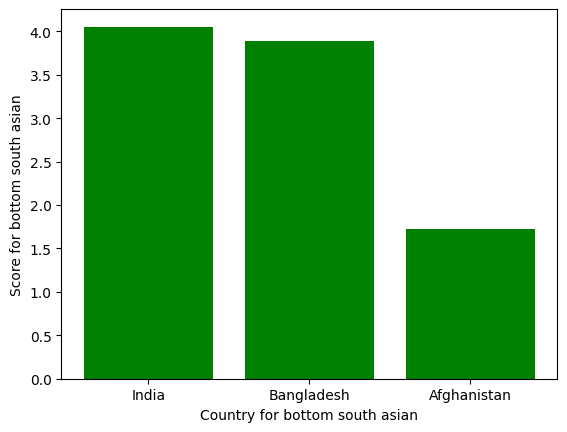

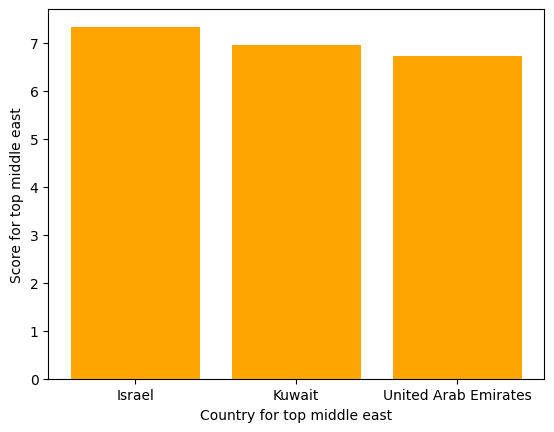

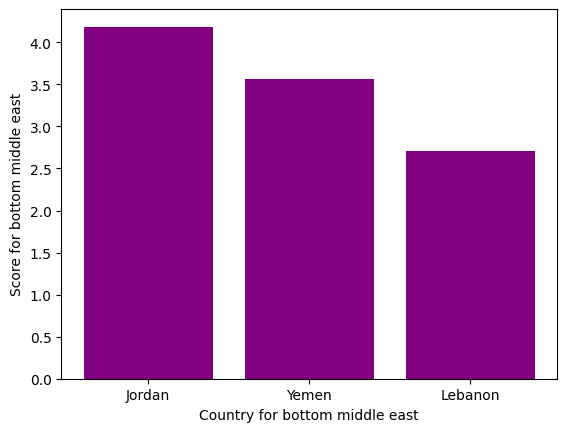

In [ ]:
middle_east_top_3 = middle_east.sort_values(by='score', ascending=False)
SADF_top_3=SADF.sort_values(by = 'score',ascending=False)
print("========================For Middle East Countries=========================")
print(middle_east_top_3['Country name'].head(3))
print(middle_east_top_3['Country name'].tail(3))
print("========================for South Asian countries============================")
print(SADF_top_3['Country name'].head(3))
print(SADF_top_3['Country name'].tail(3))
x= SADF_top_3['Country name'].head(3)
y= SADF_top_3['score'].head(3)
plt.bar(x,y,color='darkblue')
plt.xlabel("Country for top south asian")
plt.ylabel("Score for top south asian")
plt.show()
x= SADF_top_3['Country name'].tail(3)
y= SADF_top_3['score'].tail(3)
plt.bar(x,y,color='green')
plt.xlabel("Country for bottom south asian")
plt.ylabel("Score for bottom south asian")
plt.show()
x= middle_east_top_3['Country name'].head(3)
y= middle_east_top_3['score'].head(3)
plt.bar(x,y,color='orange')
plt.xlabel("Country for top middle east")
plt.ylabel("Score for top middle east")
plt.show()
x= middle_east_top_3['Country name'].tail(3)
y= middle_east_top_3['score'].tail(3)
plt.bar(x,y,color='purple')
plt.xlabel("Country for bottom middle east")
plt.ylabel("Score for bottom middle east")
plt.show()

# 3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.

• Which metrics show the largest disparity between the two regions?

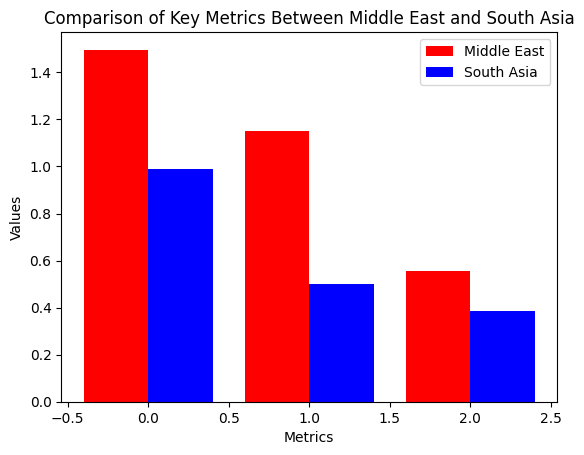

In [ ]:
import numpy as np
middle_east_GDP = middle_east['Log GDP per capita'].mean()
middle_east_social_support = middle_east['Social support'].mean()
middle_east_healthy_life_expectancy = middle_east['Healthy life expectancy'].mean()
SADF_GDP = SADF['Log GDP per capita'].mean()
SADF_social_support = SADF['Social support'].mean()
SADF_health_expectancy = SADF['Healthy life expectancy'].mean()
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
middle_east_values = [middle_east_GDP, middle_east_social_support, middle_east_healthy_life_expectancy]
SADF_values = [SADF_GDP, SADF_social_support, SADF_health_expectancy]
bar_width = 0.40
x = np.arange(len(metrics))
plt.bar(x - bar_width/2, middle_east_values, width=bar_width, color='red', label='Middle East')
plt.bar(x + bar_width/2, SADF_values, width=bar_width, color='blue', label='South Asia')
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Comparison of Key Metrics Between Middle East and South Asia")
plt.legend()
plt.show()


# 4. Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

In [ ]:
SADF_range = SADF['score'].max()-SADF['score'].min()
middle_east_range = middle_east['score'].max()-middle_east['score'].min()
SADF_CV = SADF['score'].std()/SADF['score'].mean()
middle_east_cv=middle_east['score'].std()/SADF['score'].mean()
print("Ranges: ",SADF_range,middle_east_range)
print("Coeffecient of variations: ",SADF_CV,middle_east_cv)

Ranges:  3.4370000000000003 4.634
Coeffecient of variations:  0.3378523684509764 0.4020849169317915


# 5. Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

• Create scatter plots to visualize and interpret the relationships.

0.801497903141921 0.8773326267276358
0.8632202433827544 0.8632202433827544


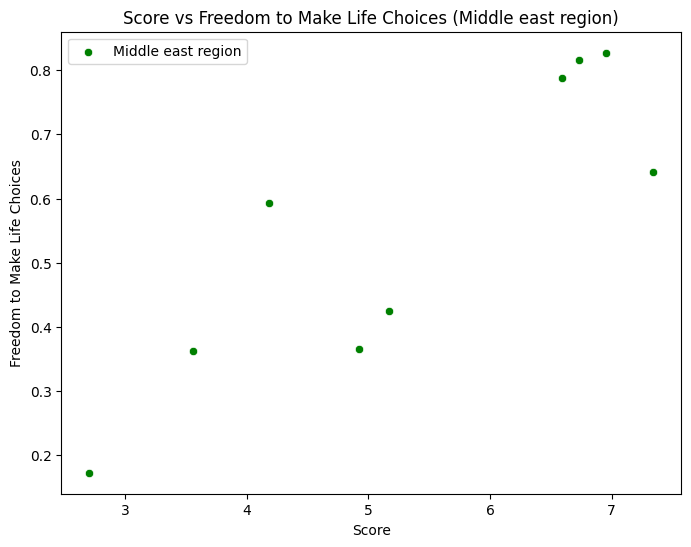

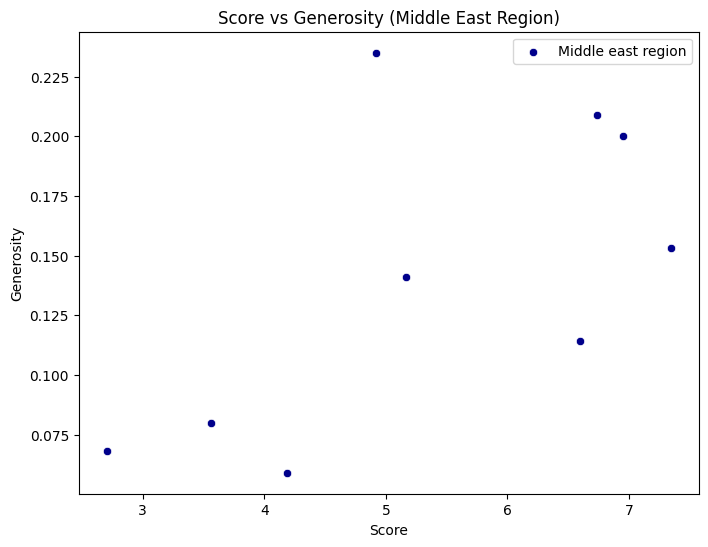

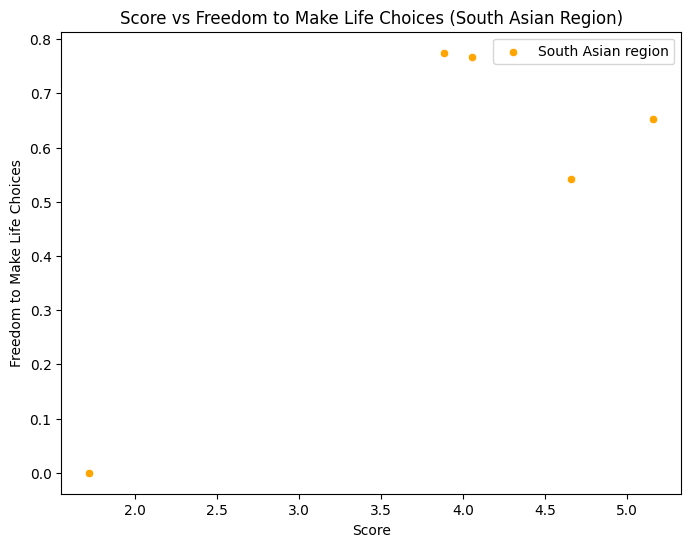

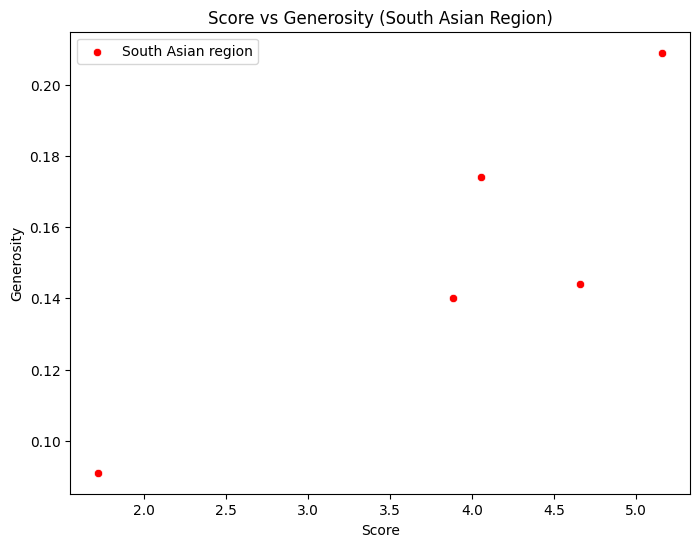

In [ ]:
import seaborn as sns
middle_east_score = middle_east['score']
middle_east_freedom =middle_east['Freedom to make life choices']
middle_east_generosity = middle_east['Generosity']
SADF_score =SADF['score']
SADF_freedom =SADF['Freedom to make life choices']
SADF_generosity=SADF['Generosity']
corr_Sadf = SADF_score.corr(SADF_freedom,method='pearson')
corr_generosity=SADF_score.corr(SADF_generosity,method='pearson')
print(corr_Sadf,corr_generosity)
corr_middle_east = middle_east_score.corr(middle_east_freedom,method='pearson')
corr_middle_east_generosity = middle_east_score.corr(middle_east_generosity,method='pearson')
print(corr_middle_east,corr_middle_east)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=middle_east, x=middle_east_score, y=middle_east_freedom, color='green', label='Middle east region')
plt.title('Score vs Freedom to Make Life Choices (Middle east region)')
plt.xlabel('Score')
plt.ylabel('Freedom to Make Life Choices')
plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(data=middle_east, x=middle_east_score, y=middle_east_generosity, color='darkblue', label='Middle east region')
plt.title('Score vs Generosity (Middle East Region)')
plt.xlabel('Score')
plt.ylabel('Generosity')
plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(data=SADF, x=SADF_score, y=SADF_freedom, color='orange', label='South Asian region')
plt.title('Score vs Freedom to Make Life Choices (South Asian Region)')
plt.xlabel('Score')
plt.ylabel('Freedom to Make Life Choices')
plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(data=SADF, x=SADF_score, y=SADF_generosity, color='red', label='South Asian region')
plt.title('Score vs Generosity (South Asian Region)')
plt.xlabel('Score')
plt.ylabel('Generosity')
plt.legend()
plt.show()

# 6. Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

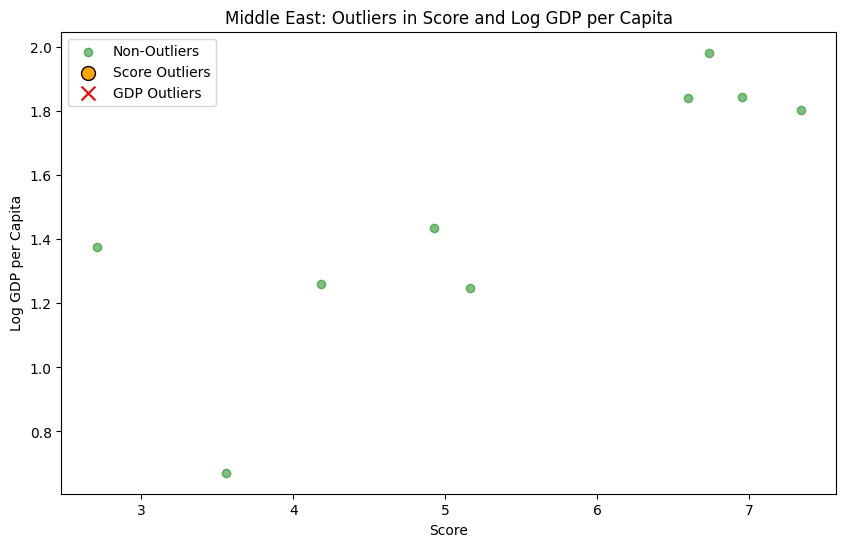

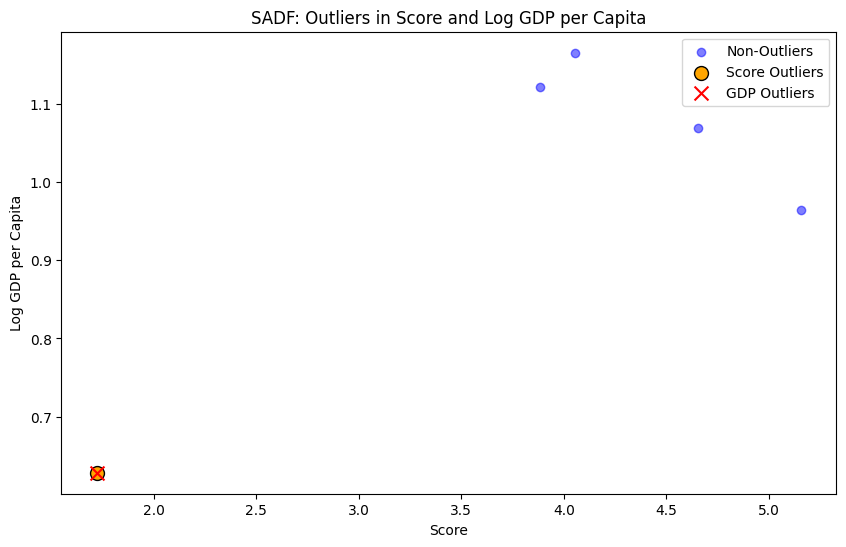

In [ ]:
middle_east_score = middle_east['score']
middle_east_gdp =middle_east['Log GDP per capita']
SADF_score =SADF['score']
SADF_gdp =SADF['Log GDP per capita']
def outliers(col_name):
    Q1 = col_name.quantile(0.25)
    Q3 = col_name.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (col_name < lower_bound) | (col_name > upper_bound)
middle_east_outliers_scr =outliers(middle_east_score)
middle_east_outliers_gdp =outliers(middle_east_gdp)
SADF_outliers_scr = outliers(SADF_score)
SADF_outliers_gdp = outliers(SADF_gdp)
plt.figure(figsize=(10, 6))
plt.scatter(middle_east['score'], middle_east['Log GDP per capita'], label='Non-Outliers', c='green', alpha=0.5)
plt.scatter(middle_east[middle_east_outliers_scr]['score'],
            middle_east[middle_east_outliers_scr]['Log GDP per capita'],
            c='orange', label='Score Outliers', marker='o', edgecolors='black', s=100)
plt.scatter(middle_east[middle_east_outliers_gdp]['score'],
            middle_east[middle_east_outliers_gdp]['Log GDP per capita'],
            c='red', label='GDP Outliers', marker='x', s=100)
plt.title("Middle East: Outliers in Score and Log GDP per Capita")
plt.xlabel("Score")
plt.ylabel("Log GDP per Capita")
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(SADF['score'], SADF['Log GDP per capita'], label='Non-Outliers', c='blue', alpha=0.5)
plt.scatter(SADF[SADF_outliers_scr]['score'],
            SADF[SADF_outliers_scr]['Log GDP per capita'],
            c='orange', label='Score Outliers', marker='o', edgecolors='black', s=100)
plt.scatter(SADF[SADF_outliers_gdp]['score'],
            SADF[SADF_outliers_gdp]['Log GDP per capita'],
            c='red', label='GDP Outliers', marker='x', s=100)
plt.title("SADF: Outliers in Score and Log GDP per Capita")
plt.xlabel("Score")
plt.ylabel("Log GDP per Capita")
plt.legend()
plt.show()
# These outlier are the extreme values that are present in the columns .These outliers have some effects on the mean but a less effect on the  median and the mode.

# 7. Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

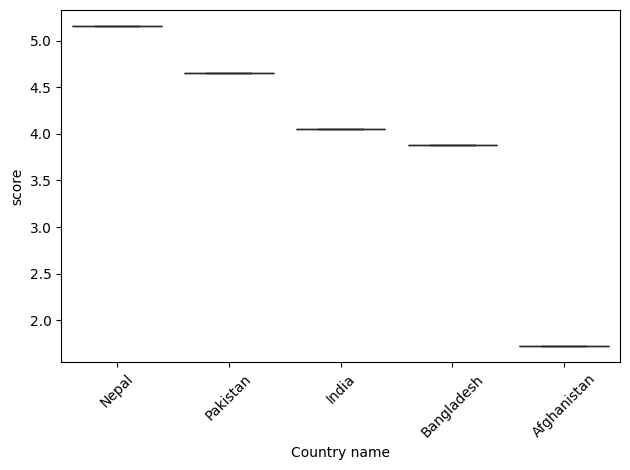

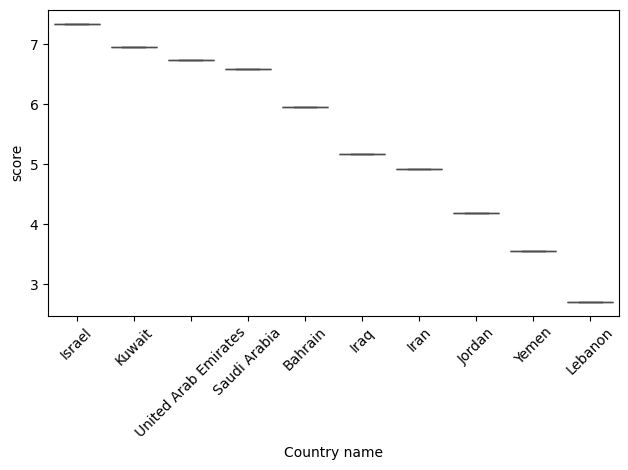

In [ ]:
sns.boxplot(x='Country name',y='score',data=SADF,color='darkblue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
sns.boxplot(x='Country name',y='score',data=middle_east,color='gray')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()